In [7]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')



In [8]:
file_names = ['F:\\data\\reviews_Musical_Instruments_5.json.gz']
df = getDF(file_names[0])

In [9]:
df.head()

,reviewerName,asin,overall,unixReviewTime,reviewTime,summary,reviewerID,helpful,reviewText
0,"cassandra tu ""Yeah, well, that's just like, u...",1384719342,5.0,1393545600,"02 28, 2014",good,A2IBPI20UZIR0U,"[0, 0]","Not much to write about here, but it does exac..."
1,Jake,1384719342,5.0,1363392000,"03 16, 2013",Jake,A14VAT5EAX3D9S,"[13, 14]",The product does exactly as it should and is q...
2,"Rick Bennette ""Rick Bennette""",1384719342,5.0,1377648000,"08 28, 2013",It Does The Job Well,A195EZSQDW3E21,"[1, 1]",The primary job of this device is to block the...
3,"RustyBill ""Sunday Rocker""",1384719342,5.0,1392336000,"02 14, 2014",GOOD WINDSCREEN FOR THE MONEY,A2C00NNG1ZQQG2,"[0, 0]",Nice windscreen protects my MXL mic and preven...
4,SEAN MASLANKA,1384719342,5.0,1392940800,"02 21, 2014",No more pops when I record my vocals.,A94QU4C90B1AX,"[0, 0]",This pop filter is great. It looks and perform...


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def plot_rating(df,min_rev):
    '''
    plot the rating vs time for products that have
    at least min_rev number of reviews
    '''
    
    #The list of item ids with at least min_rev number of reviews
    item_ids = list(df.asin.value_counts()[df.asin.value_counts() > min_rev].index)
    num_items = len(item_ids)
    ave_rating = []
    ave_rating_first5 = []
    
    
    for item_id in item_ids:
        df_all_revs_that_item = df.loc[df['asin'] == item_id] #a dataframe

        ### Need to sort the reviews by review time
        df_all_revs_that_item_sorted_by_dates = df_all_revs_that_item.sort_values('unixReviewTime', ascending=True)

        #find that item mean rating
        df_that_item_mean_rating = df_all_revs_that_item['overall'].mean()
        ave_rating.append(df_that_item_mean_rating)
        
        #find that item mean rating of the first 5 reviews (probably why Amazon shows only 5 revs on first page)
        df_that_item_mean_rating_first5 = df_all_revs_that_item['overall'][0:5].mean()
        ave_rating_first5.append(df_that_item_mean_rating_first5)

        #find earliest and latest review dates
        earliest = df_all_revs_that_item['unixReviewTime'].min()
        latest =   df_all_revs_that_item['unixReviewTime'].max()

        #plot the rating against time vs mean rating
        plt.scatter(df_all_revs_that_item_sorted_by_dates['unixReviewTime'], df_all_revs_that_item_sorted_by_dates['overall'])
        plt.hlines(df_that_item_mean_rating, earliest, latest,linewidth=2, color = 'r')
        plt.hlines(df_that_item_mean_rating_first5, earliest, latest)
        plt.show()
    
    return ave_rating, ave_rating_first5


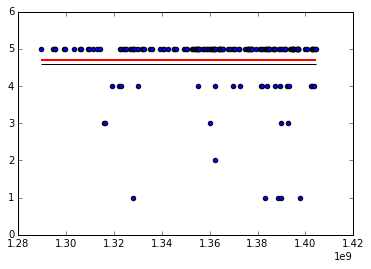

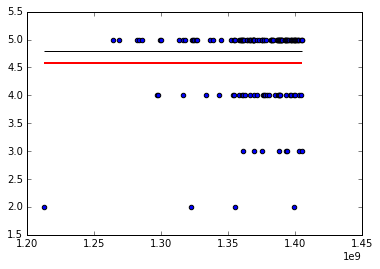

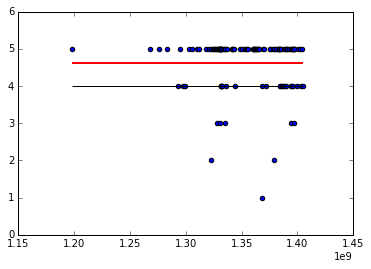

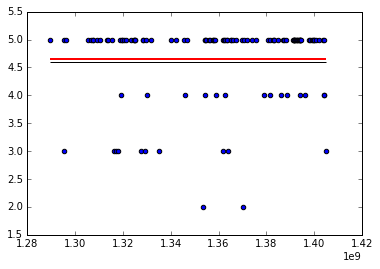

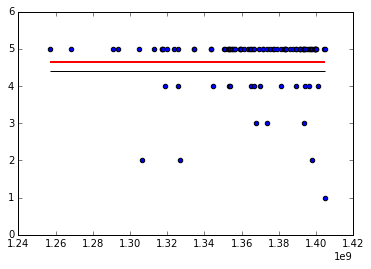

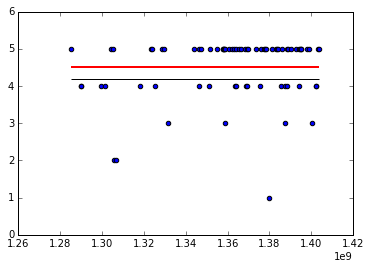

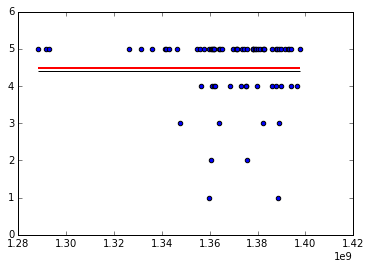

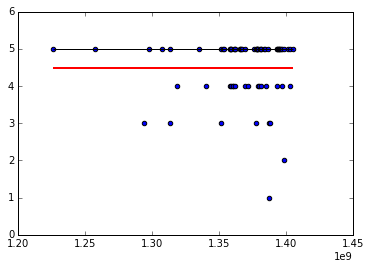

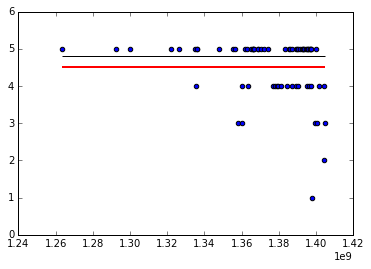

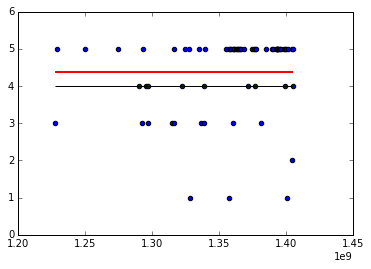

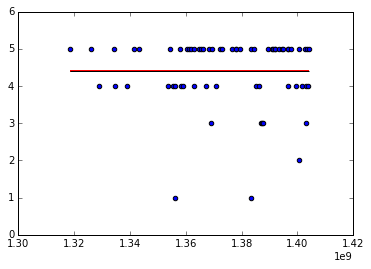

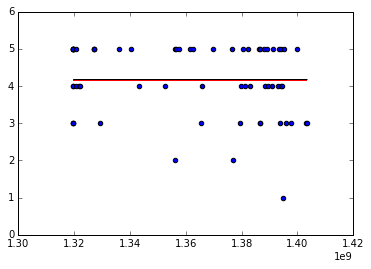

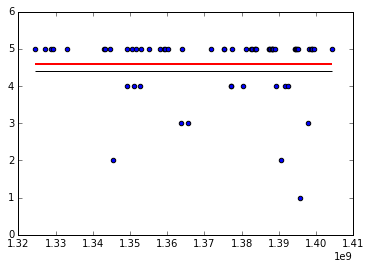

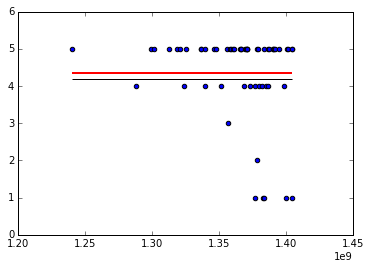

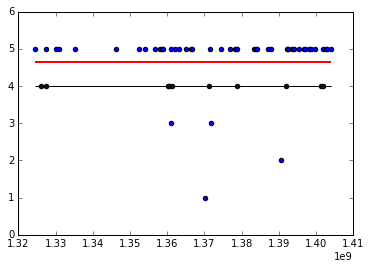

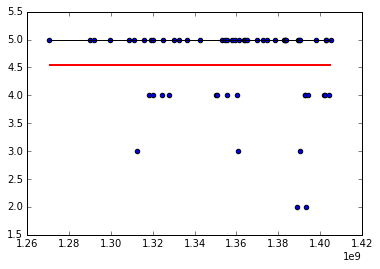

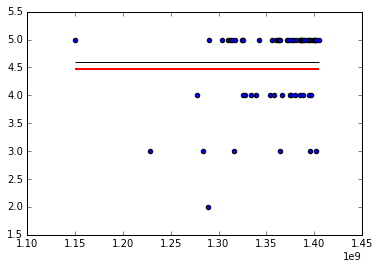

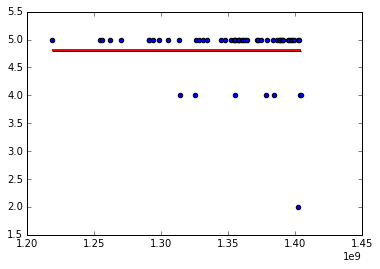

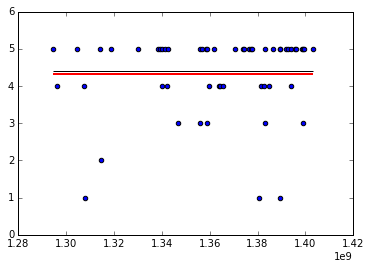

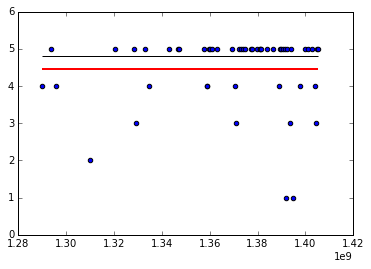

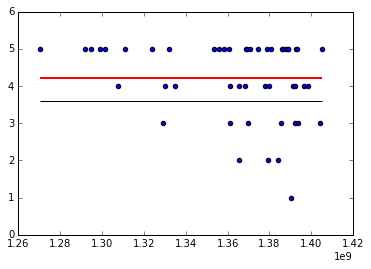

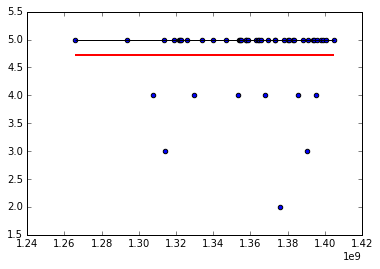

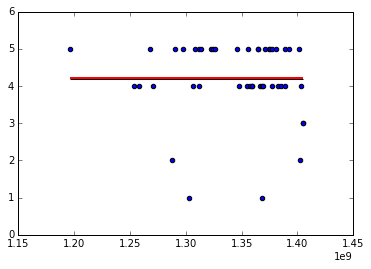

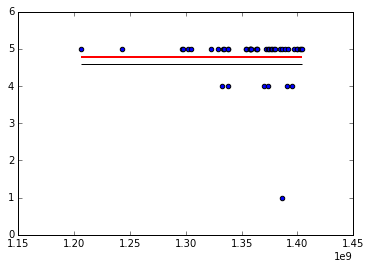

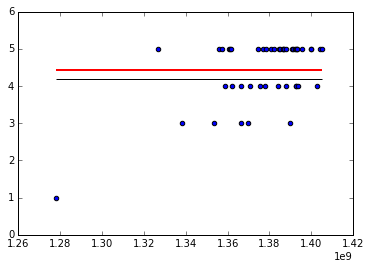

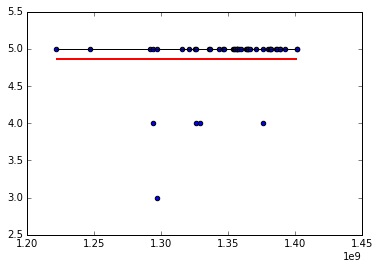

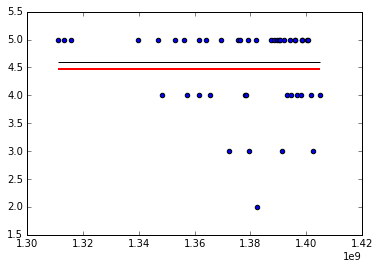

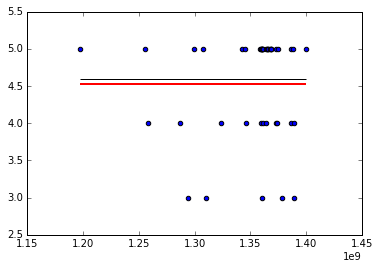

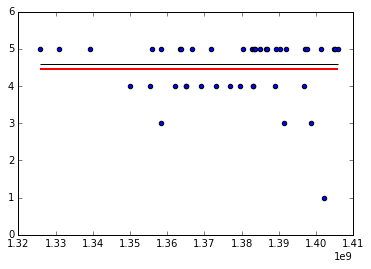

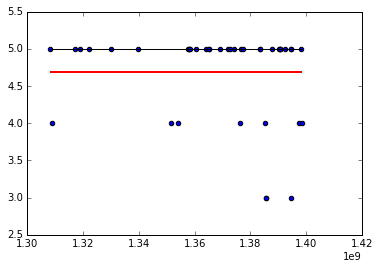

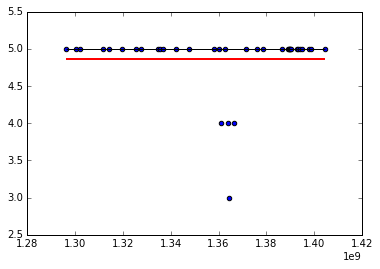

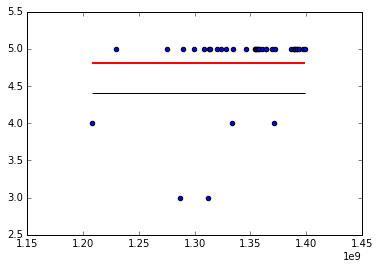

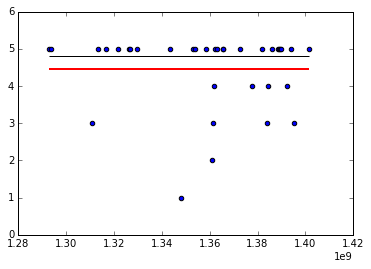

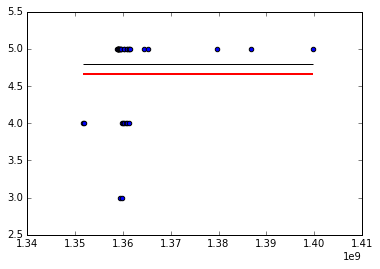

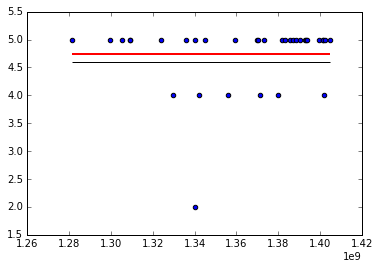

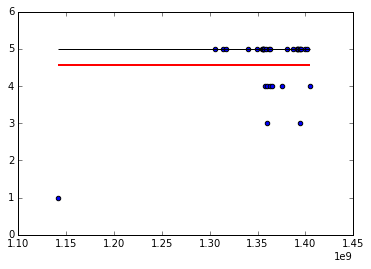

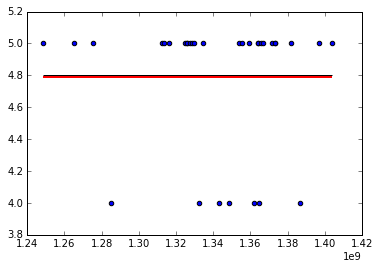

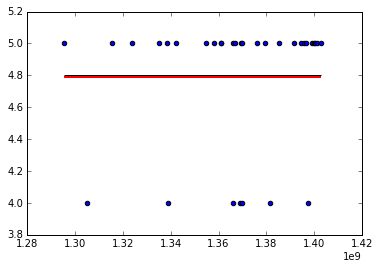

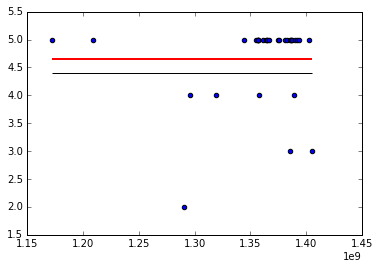

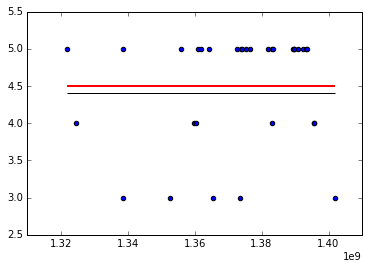

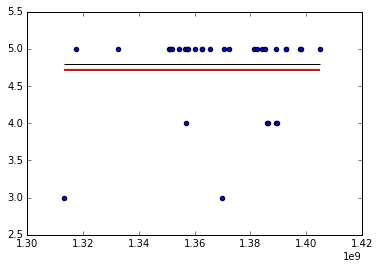

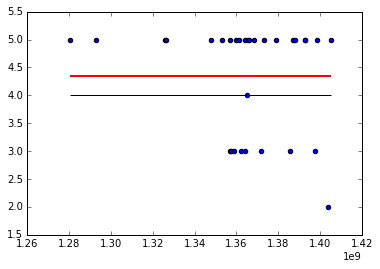

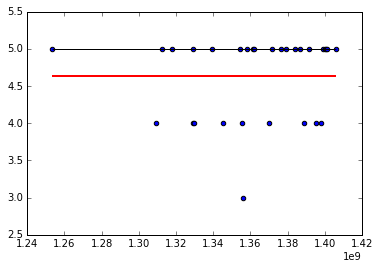

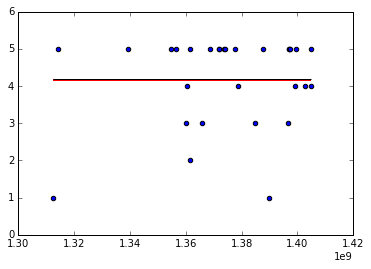

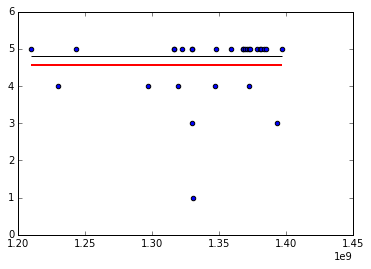

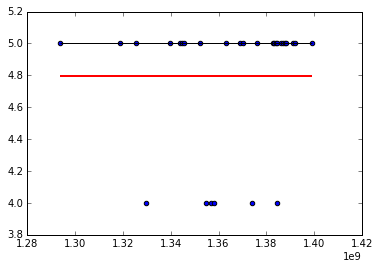

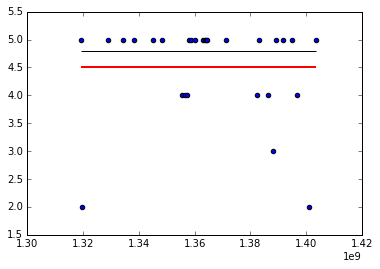

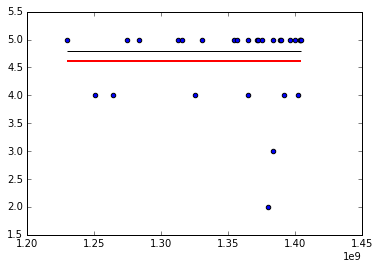

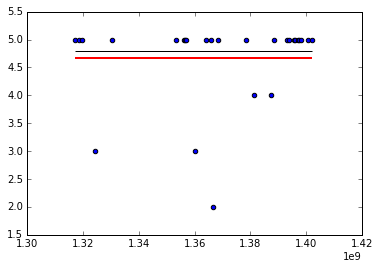

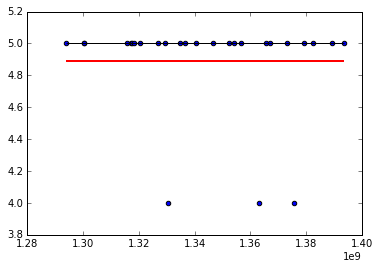

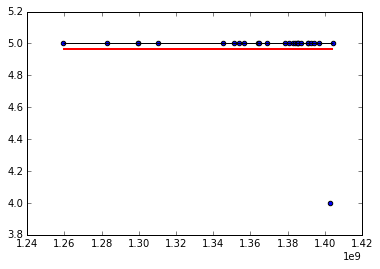

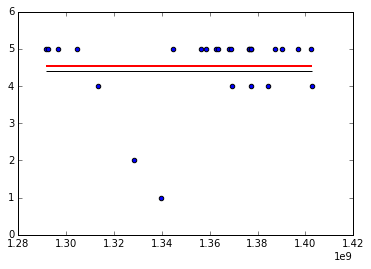

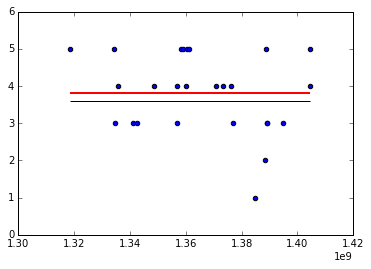

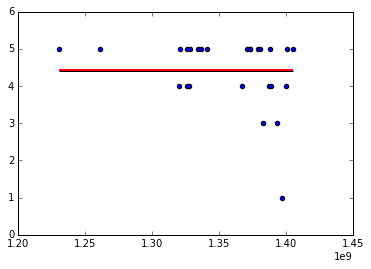

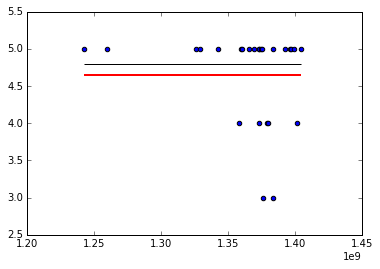

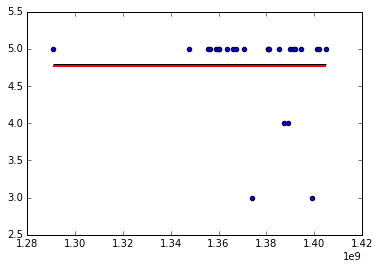

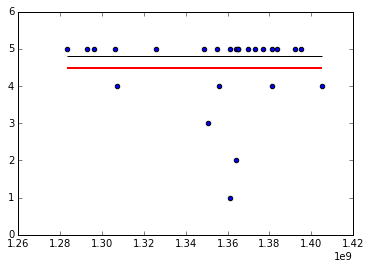

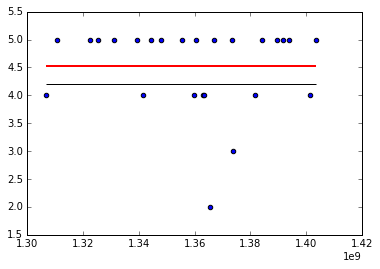

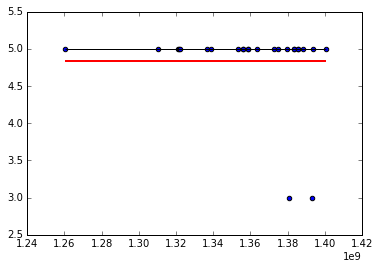

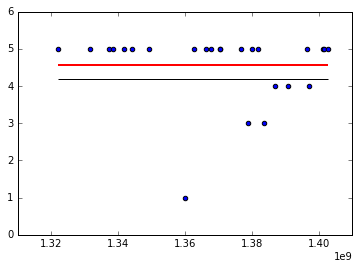

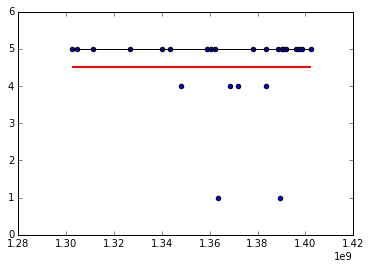

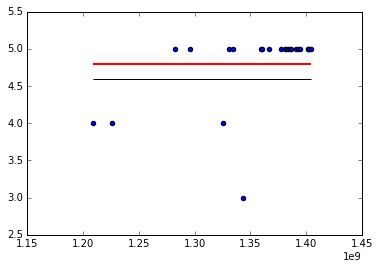

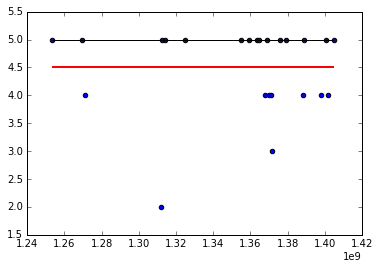

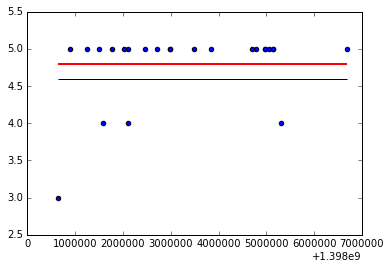

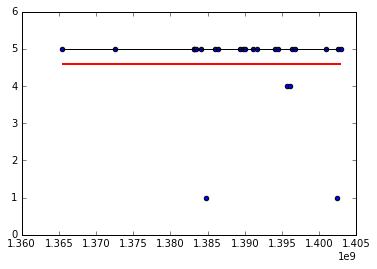

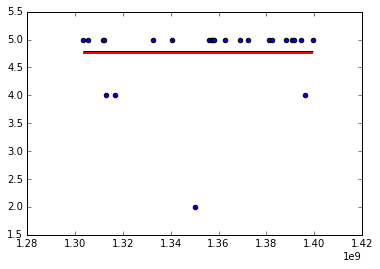

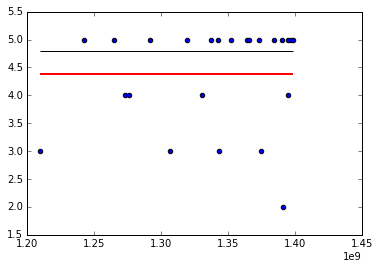

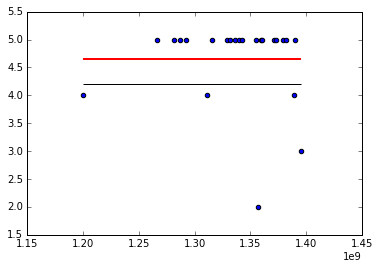

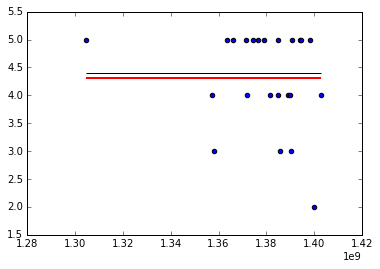

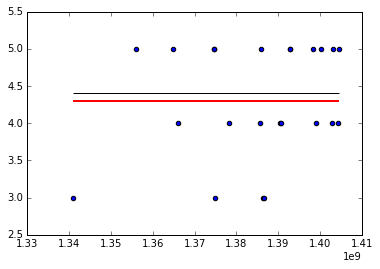

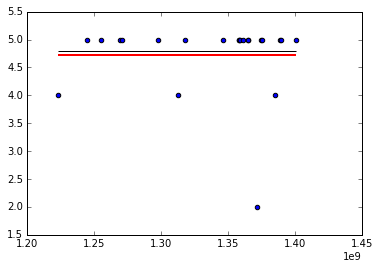

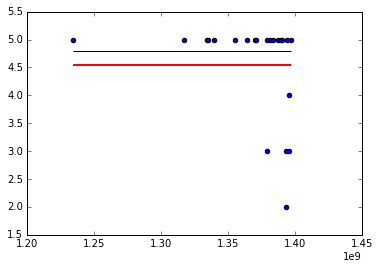

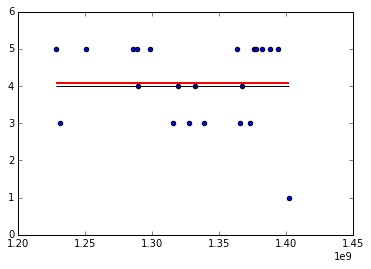

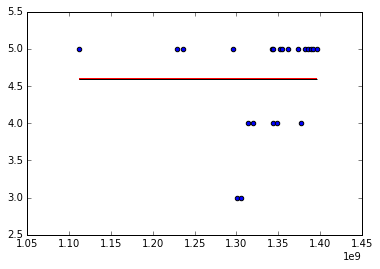

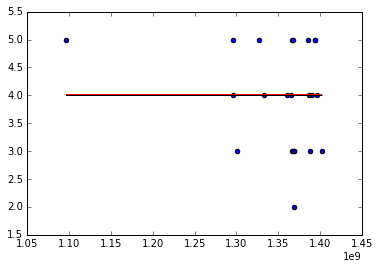

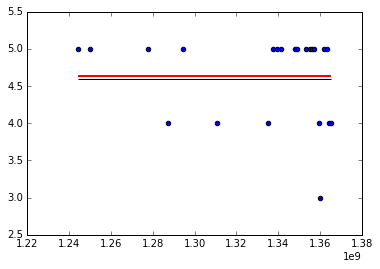

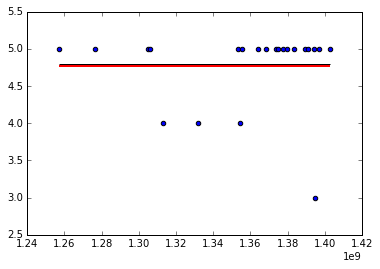

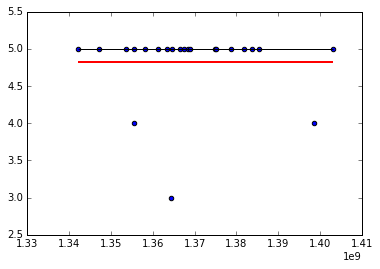

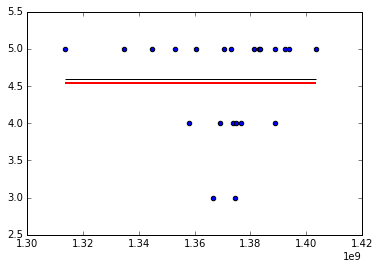

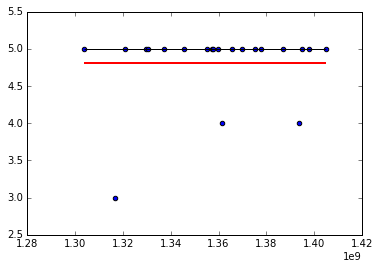

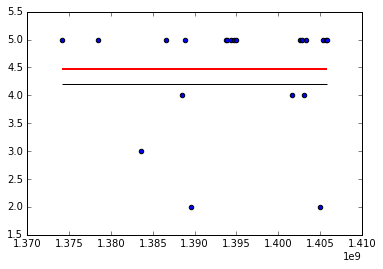

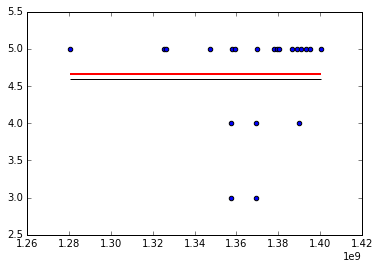

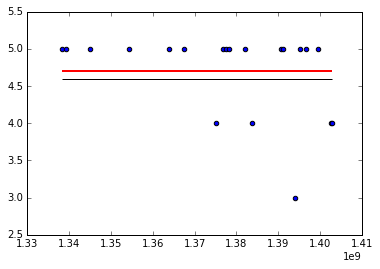

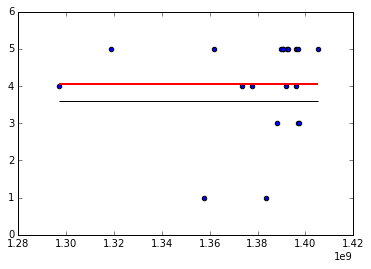

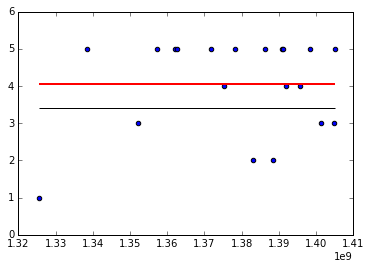

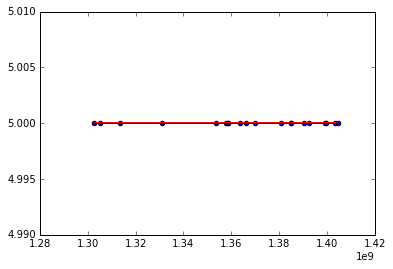

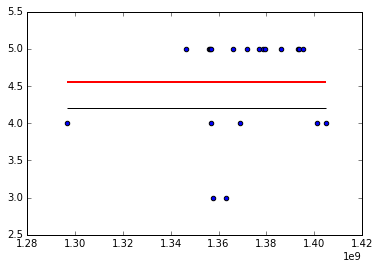

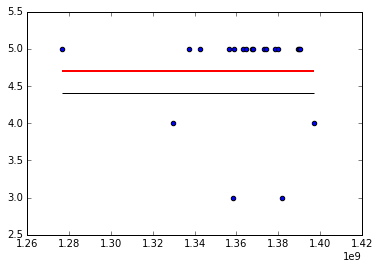

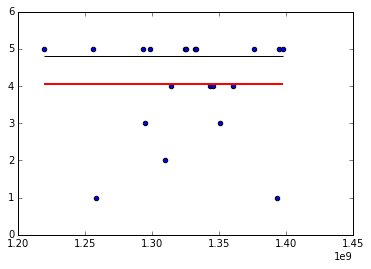

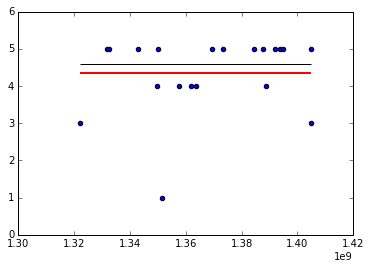

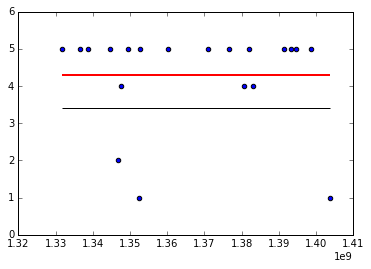

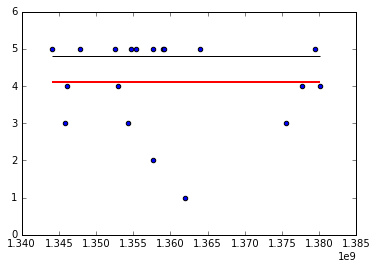

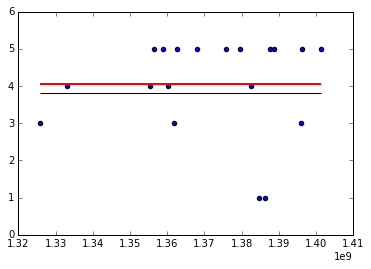

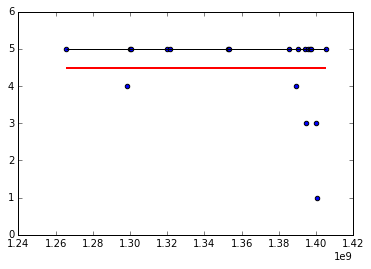

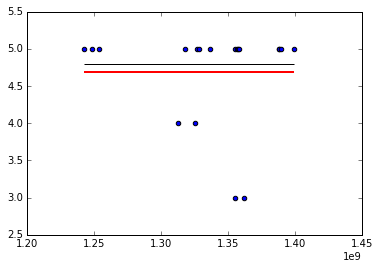

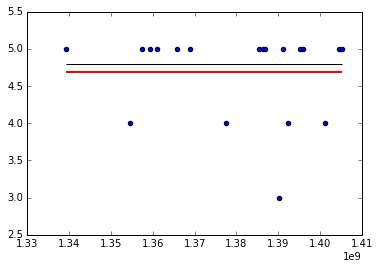

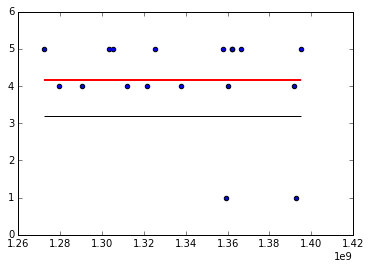

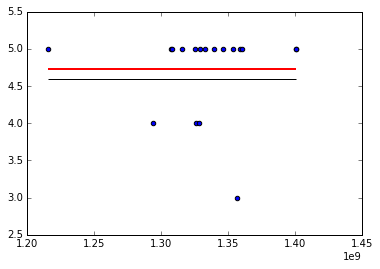

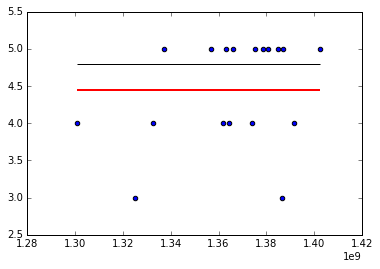

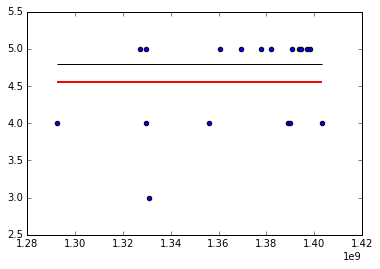

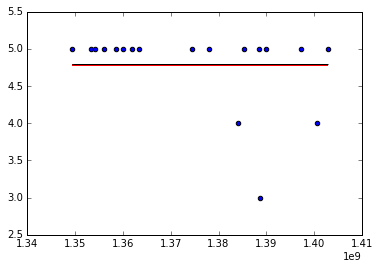

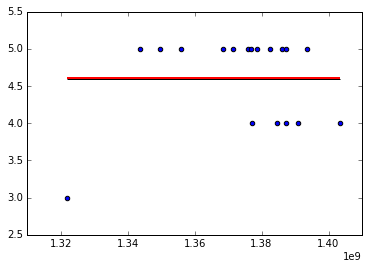

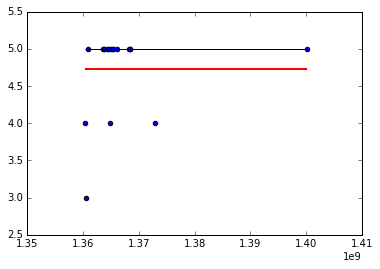

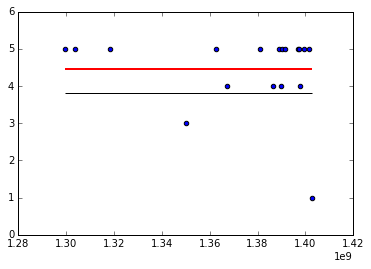

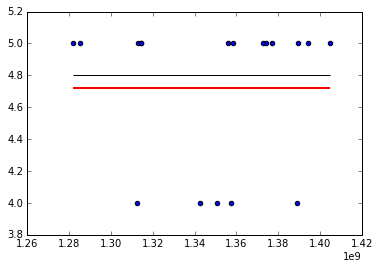

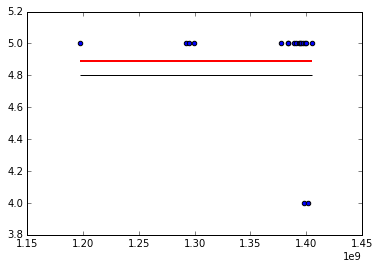

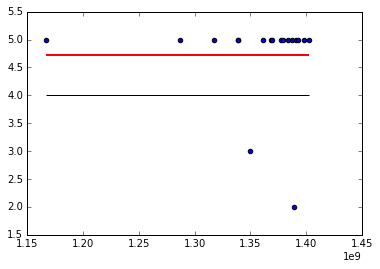

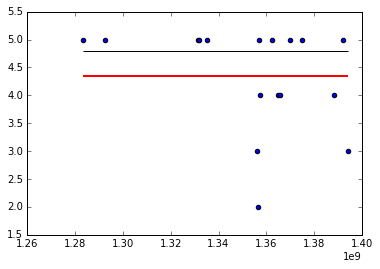

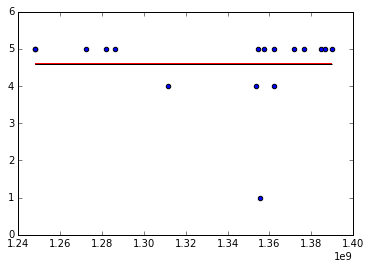

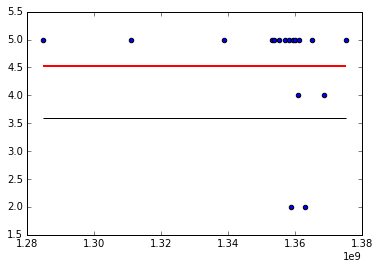

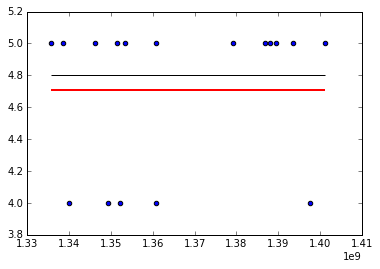

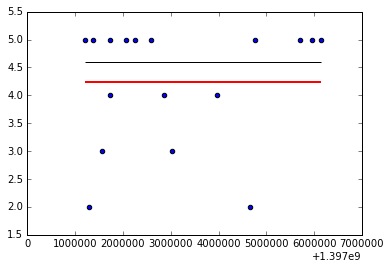

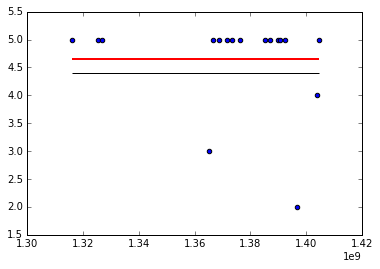

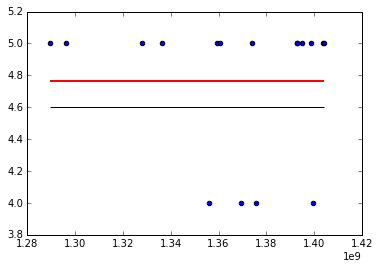

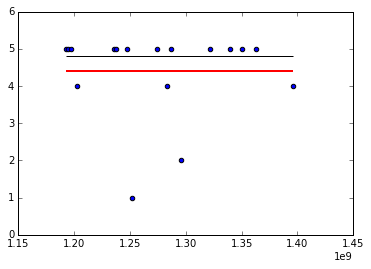

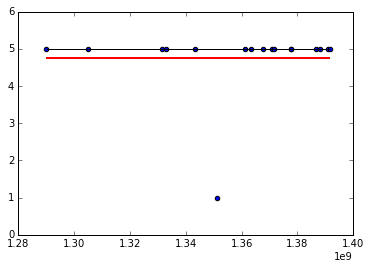

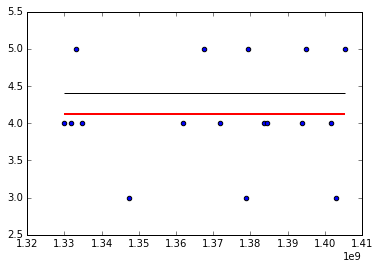

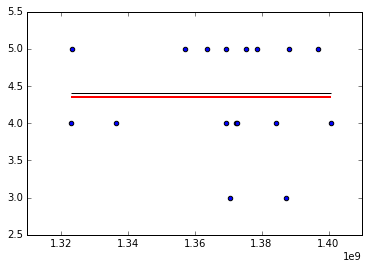

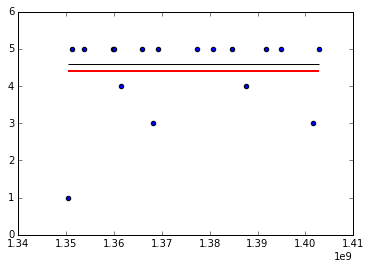

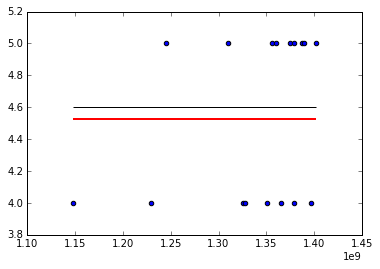

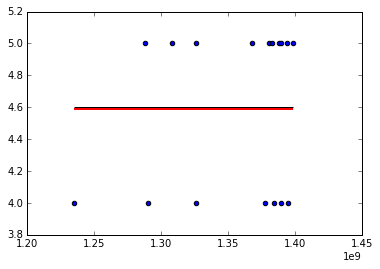

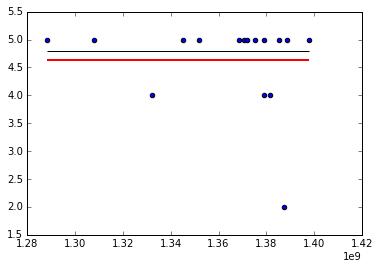

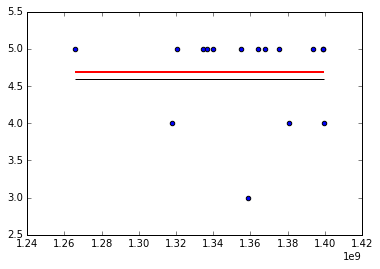

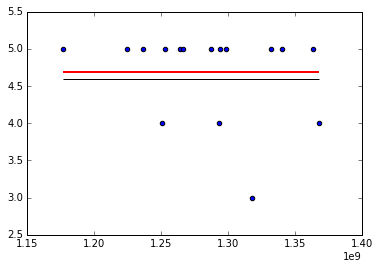

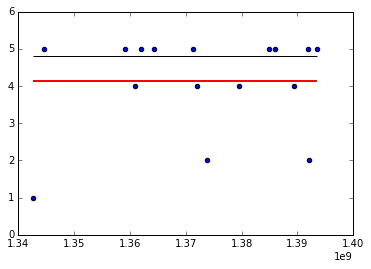

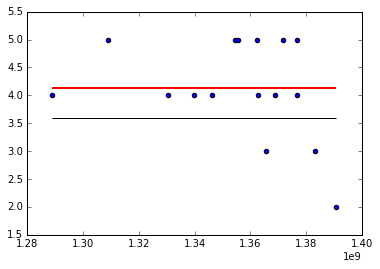

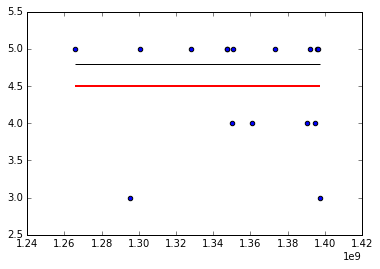

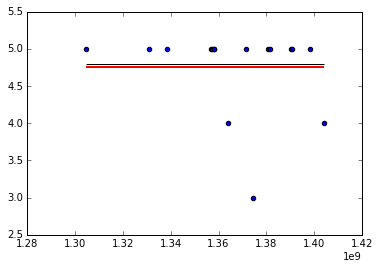

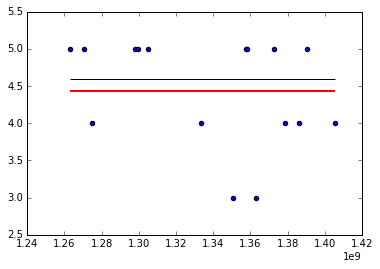

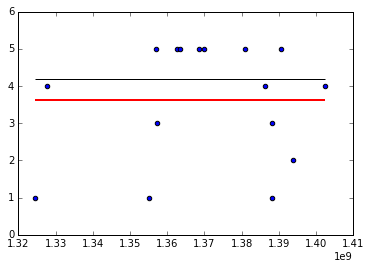

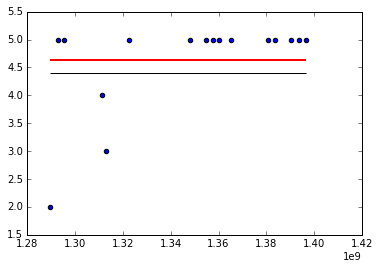

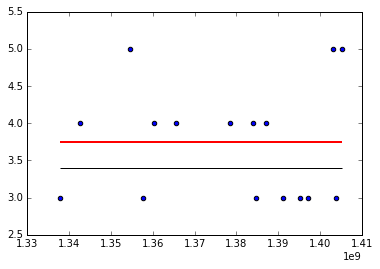

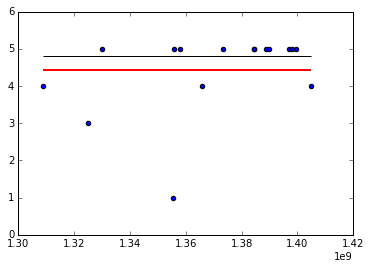

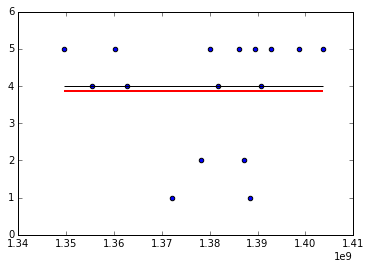

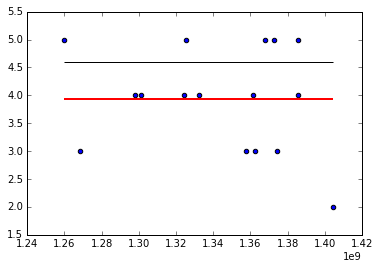

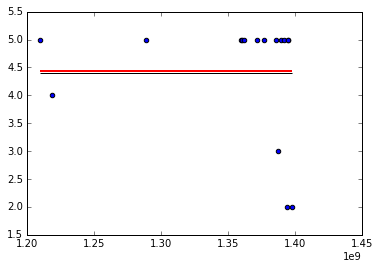

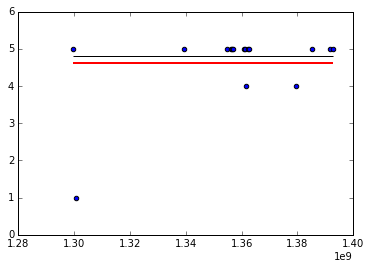

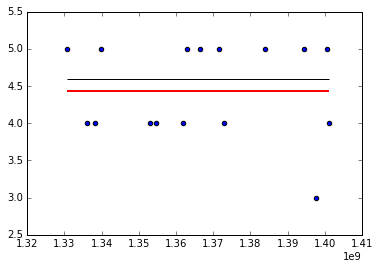

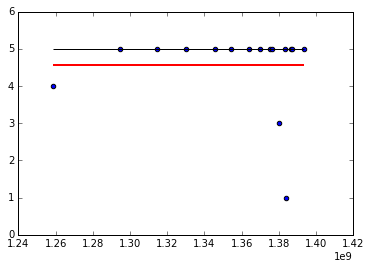

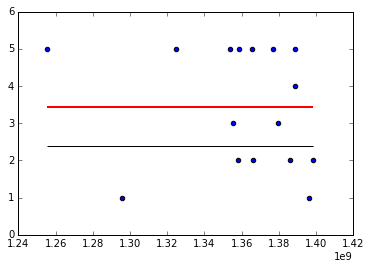

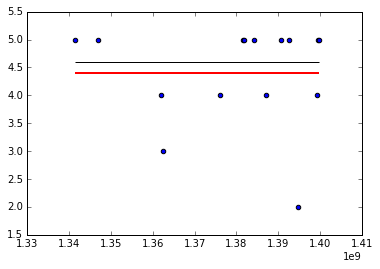

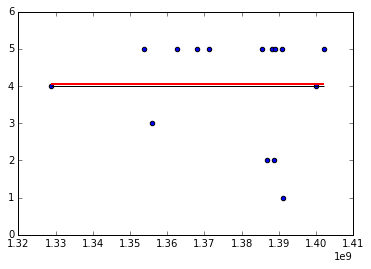

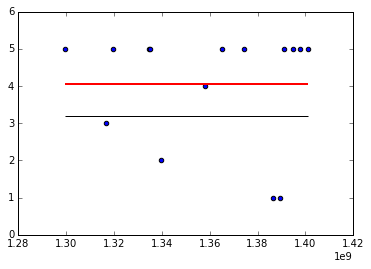

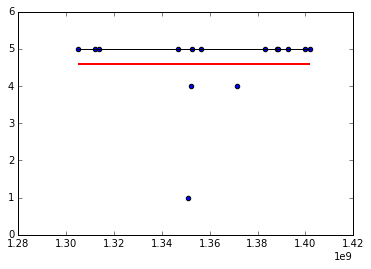

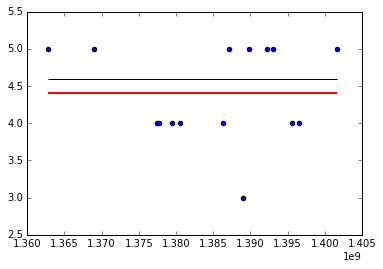

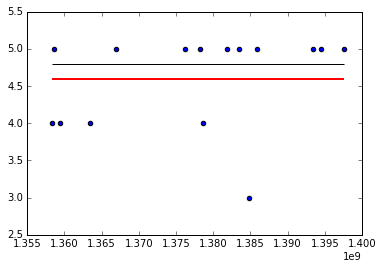

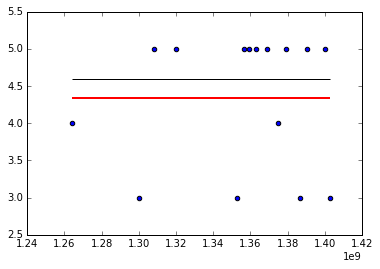

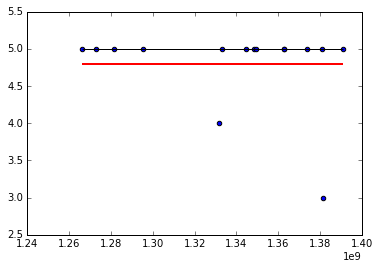

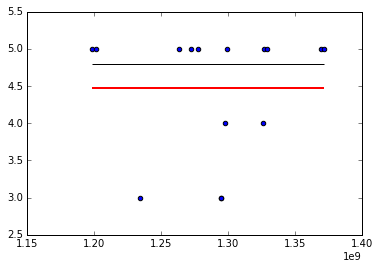

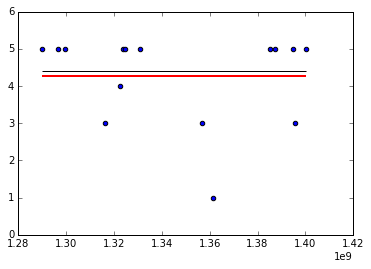

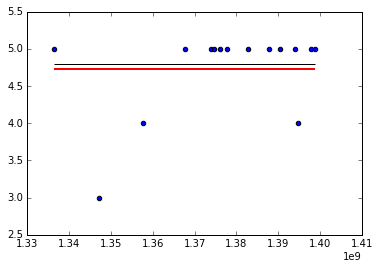

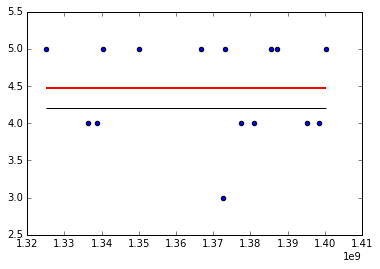

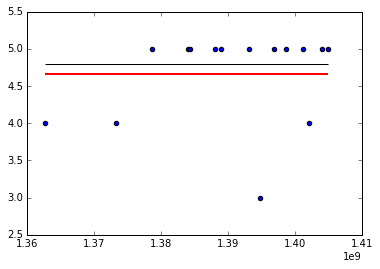

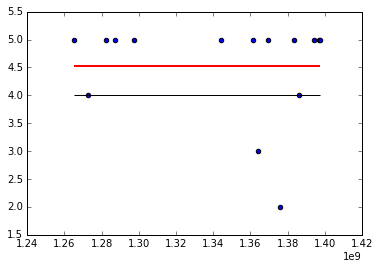

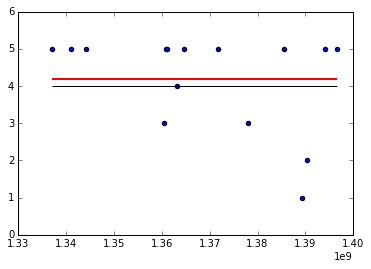

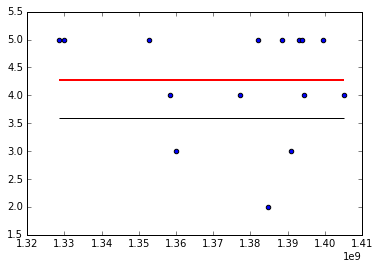

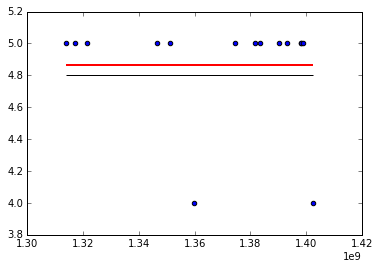

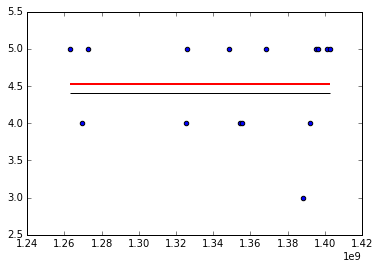

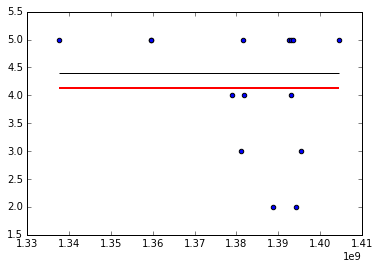

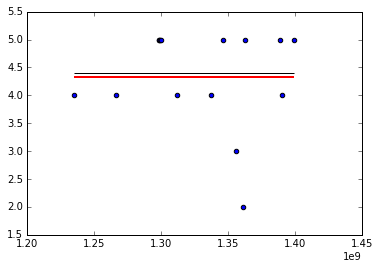

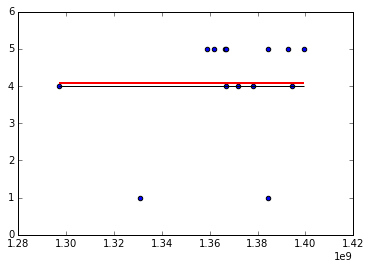

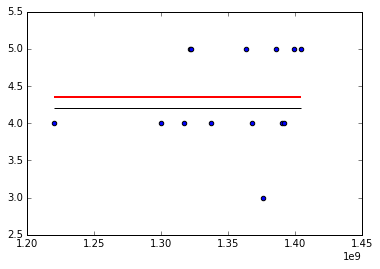

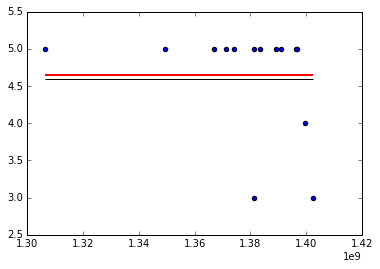

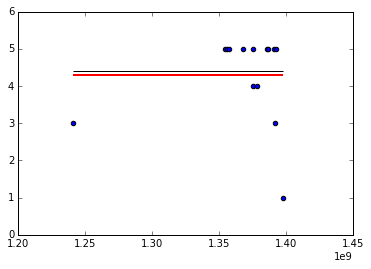

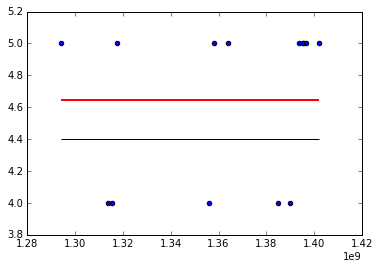

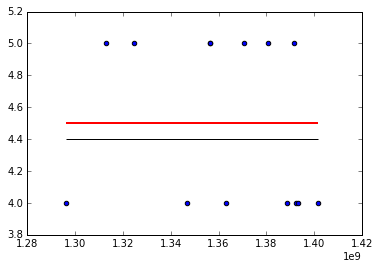

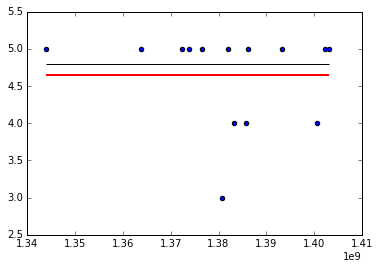

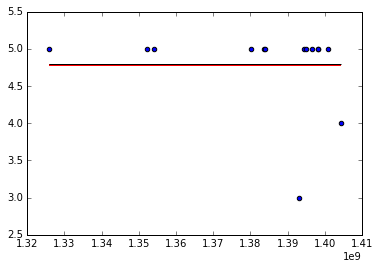

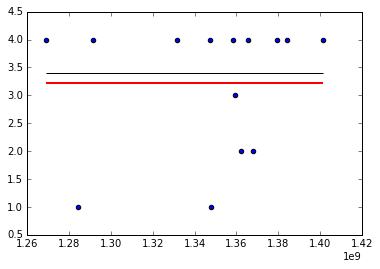

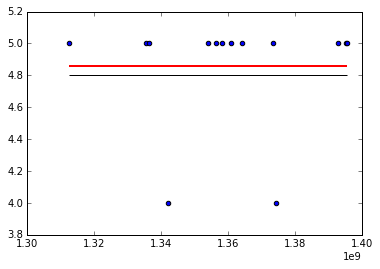

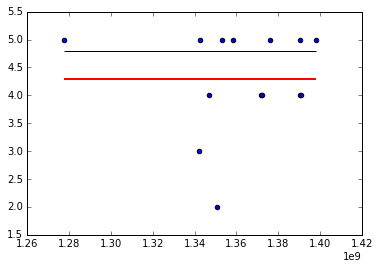

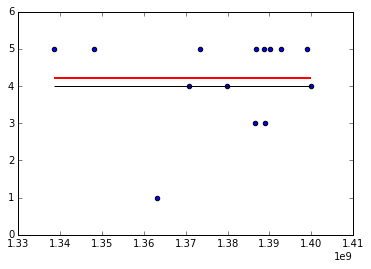

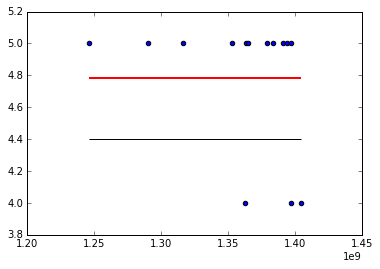

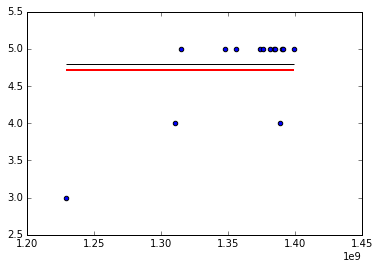

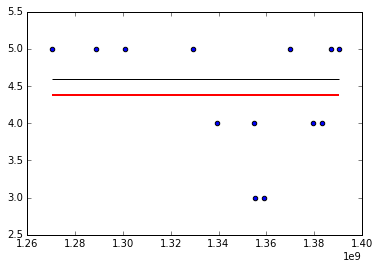

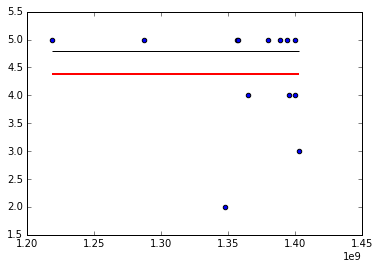

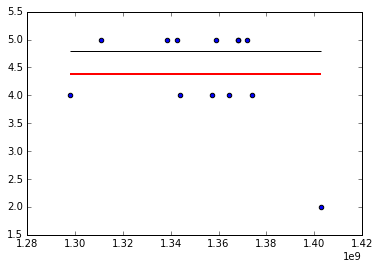

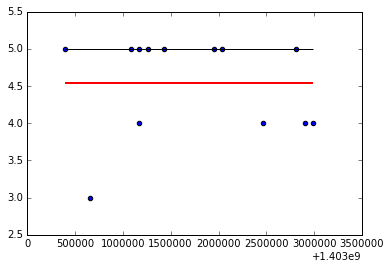

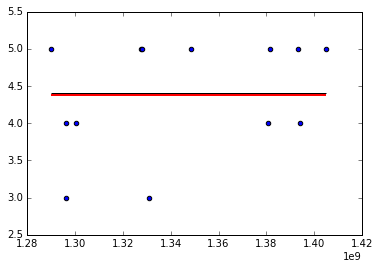

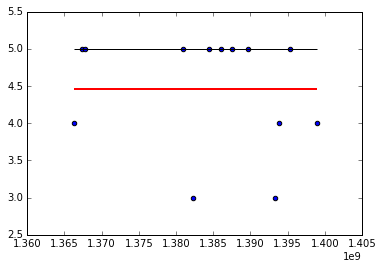

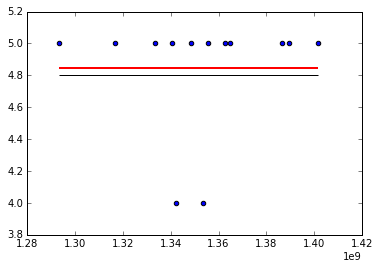

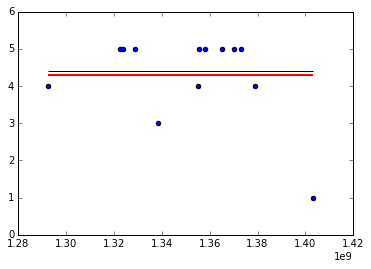

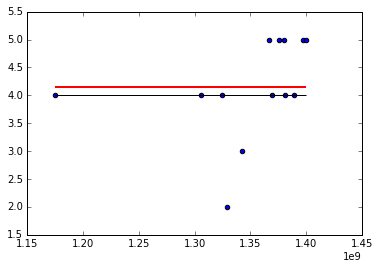

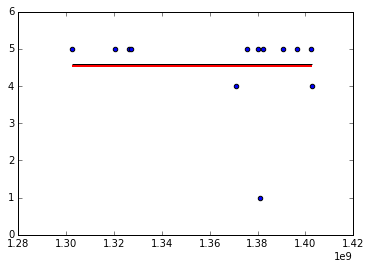

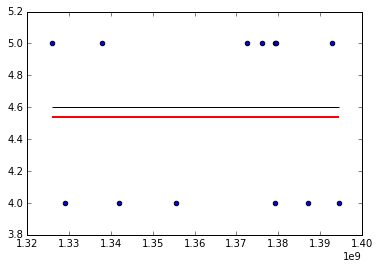

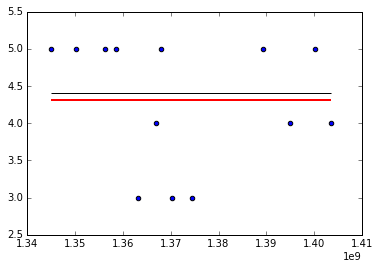

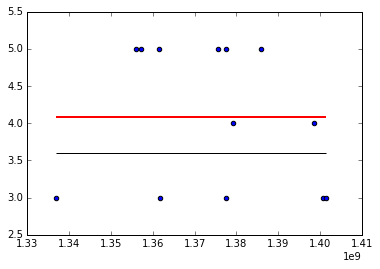

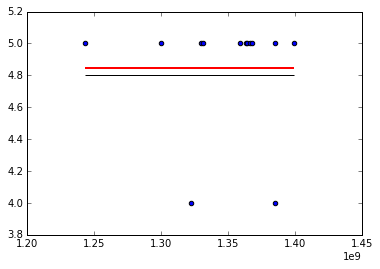

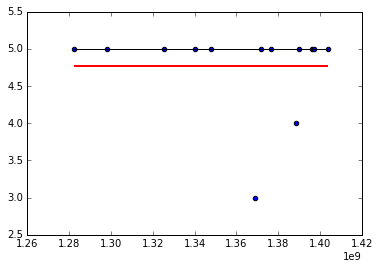

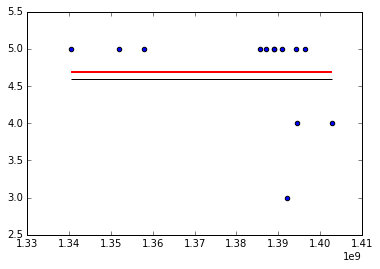

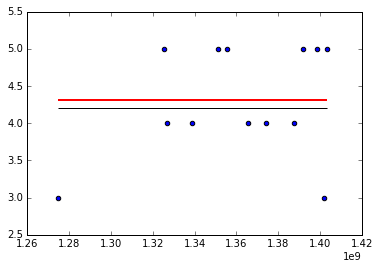

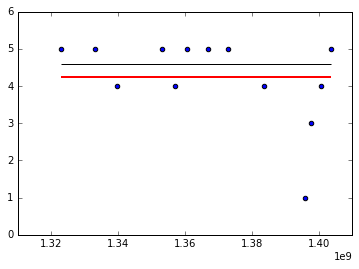

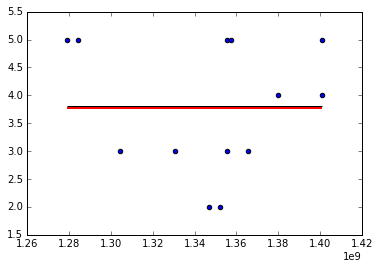

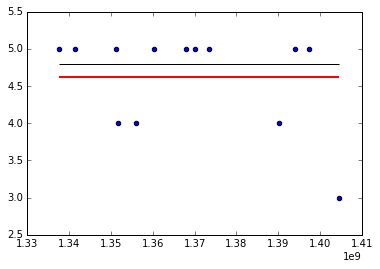

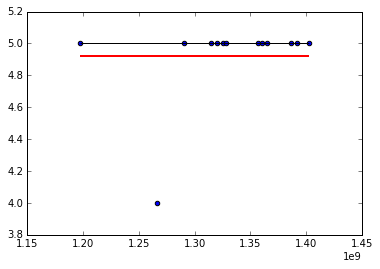

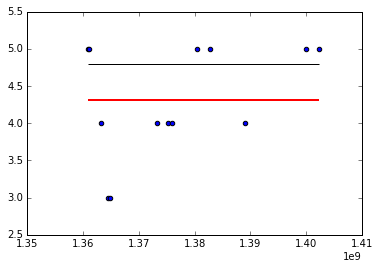

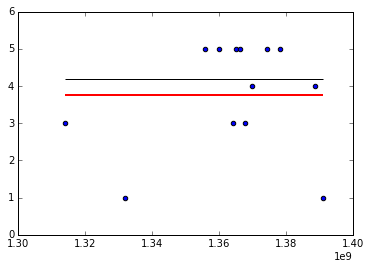

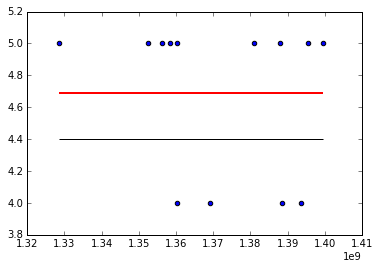

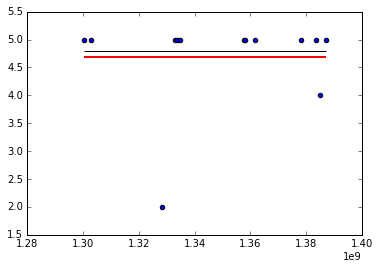

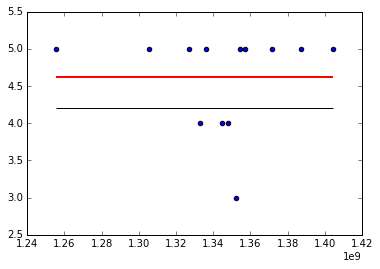

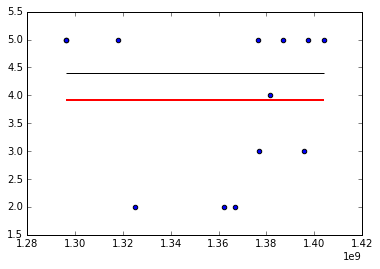

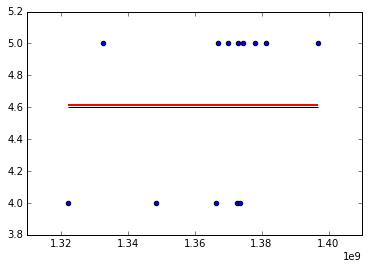

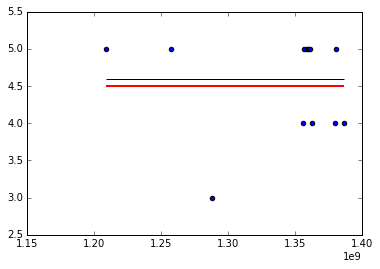

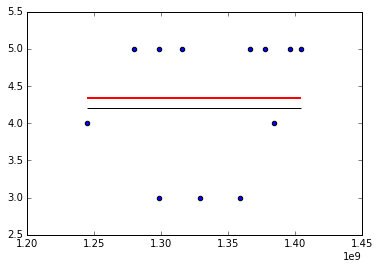

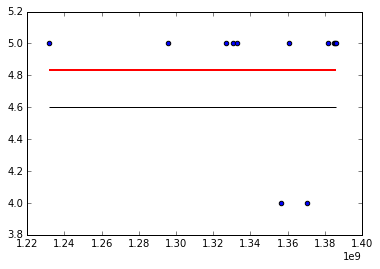

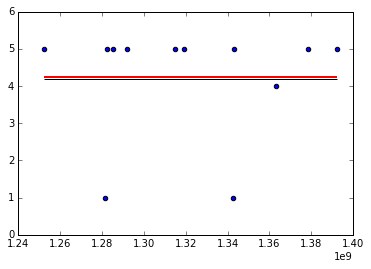

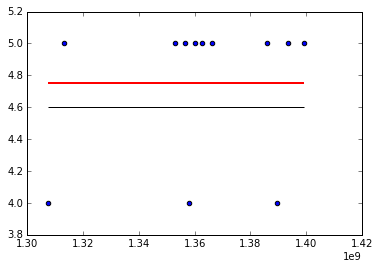

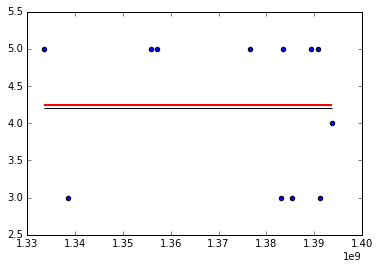

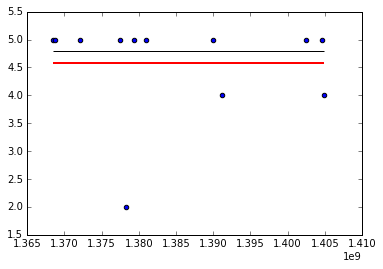

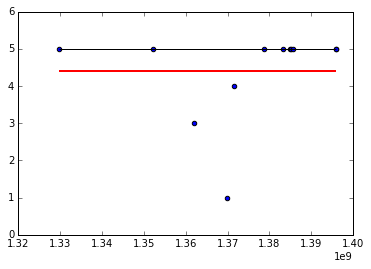

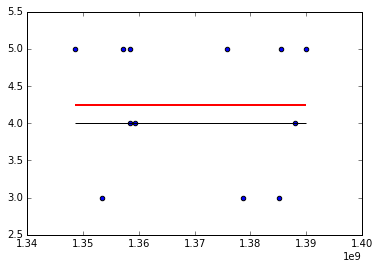

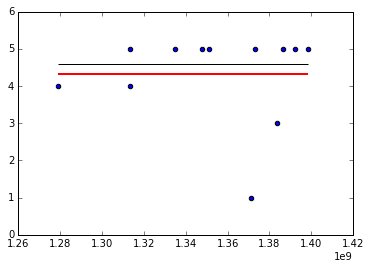

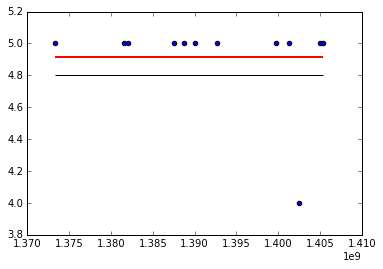

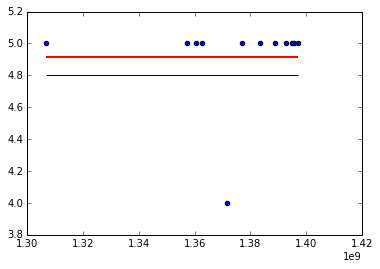

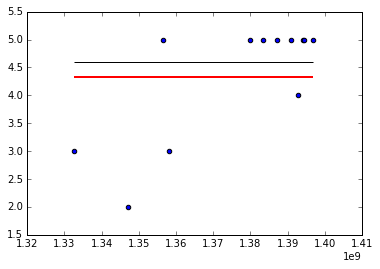

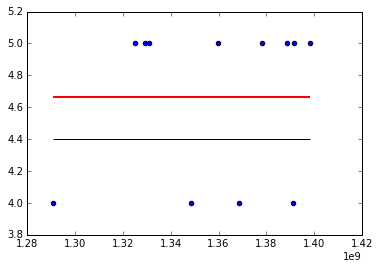

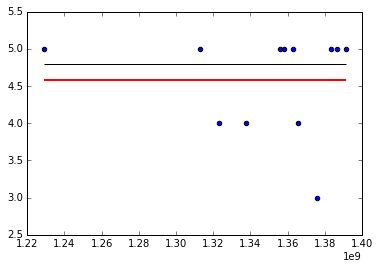

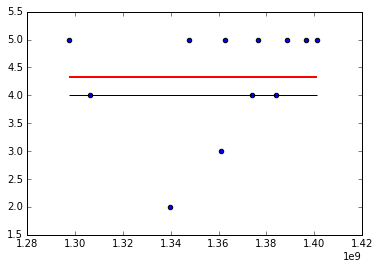

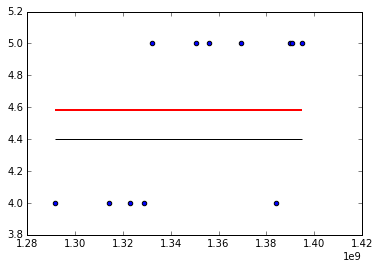

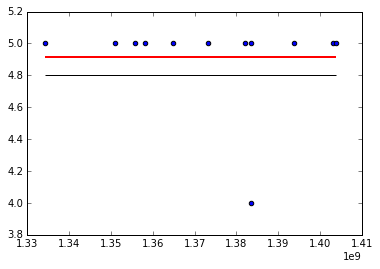

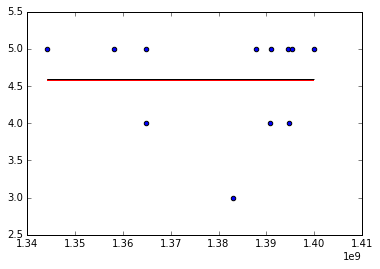

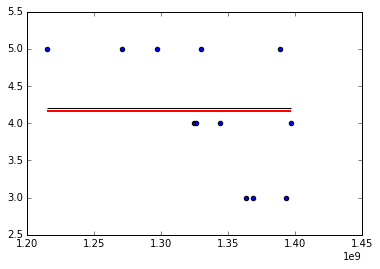

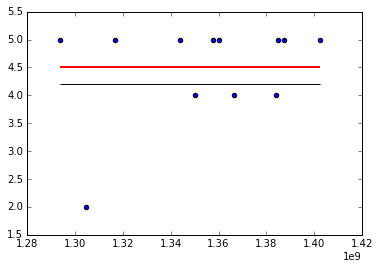

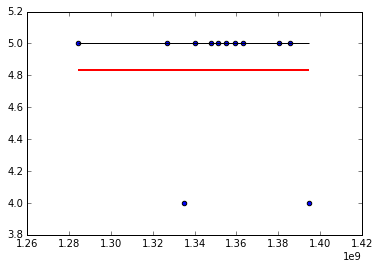

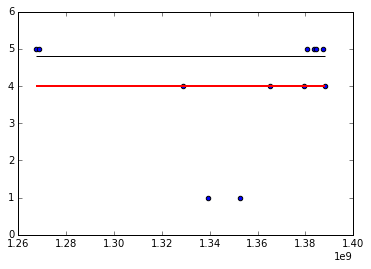

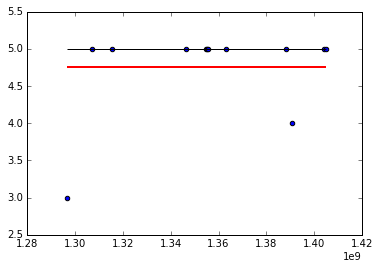

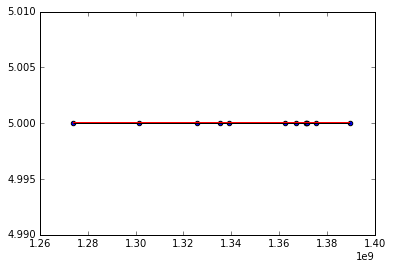

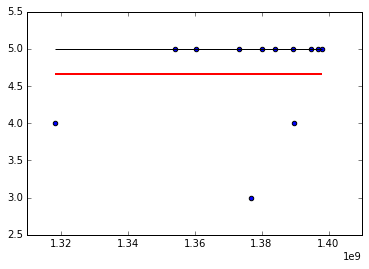

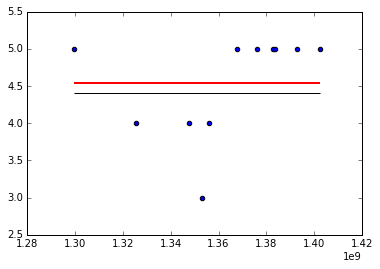

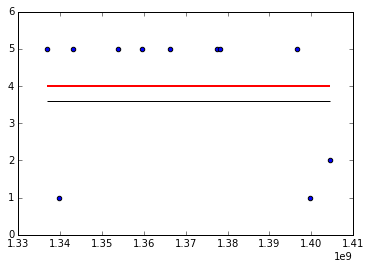

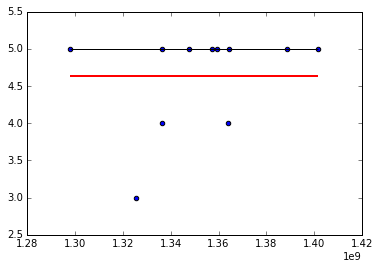

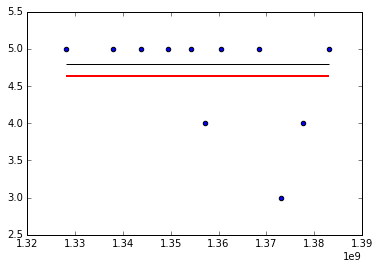

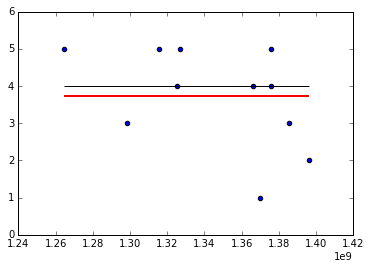

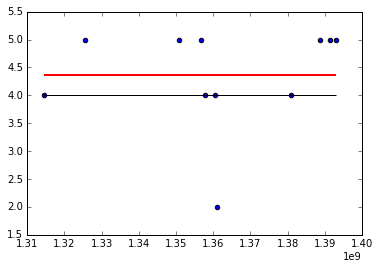

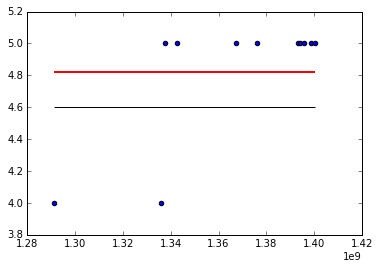

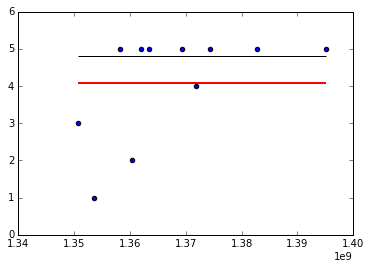

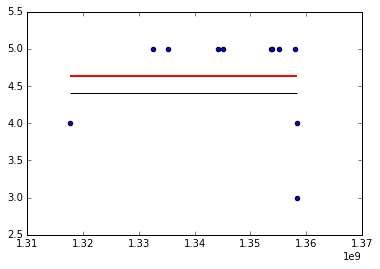

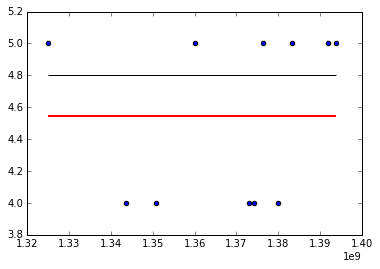

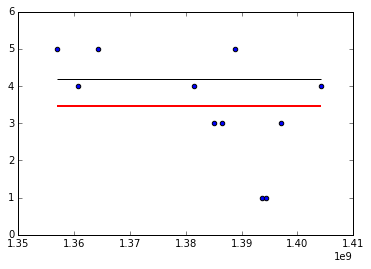

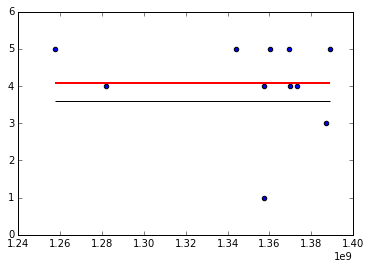

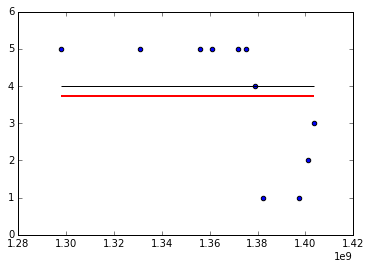

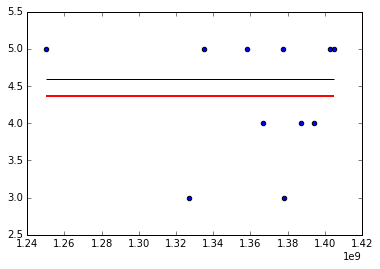

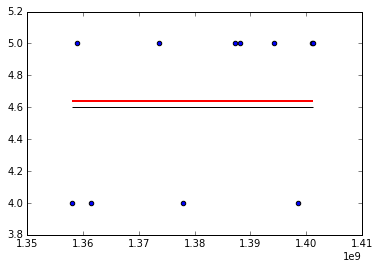

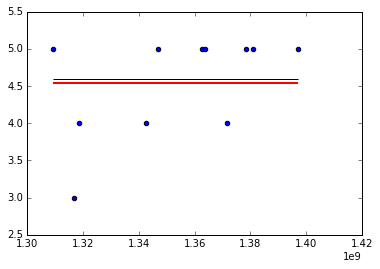

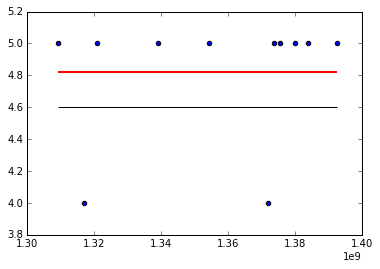

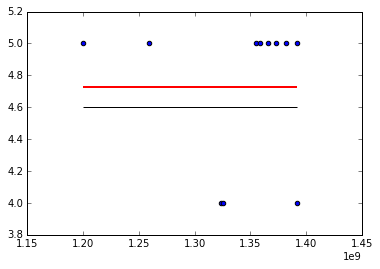

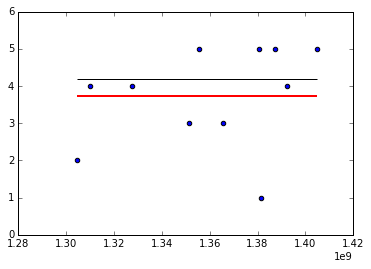

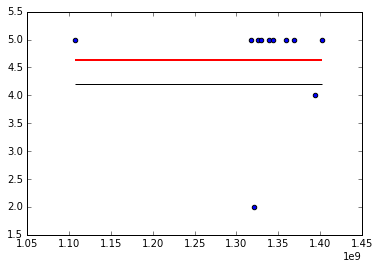

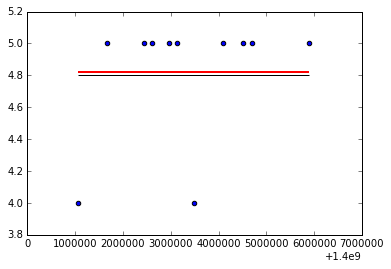

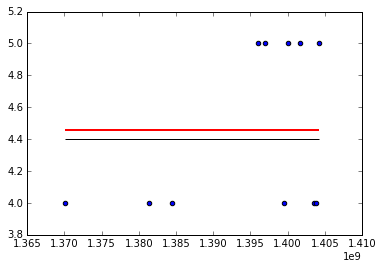

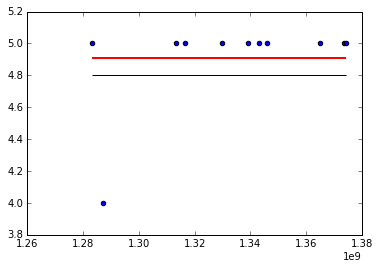

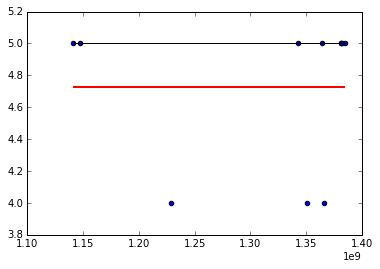

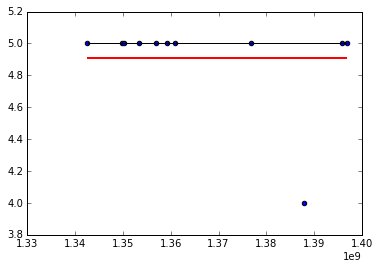

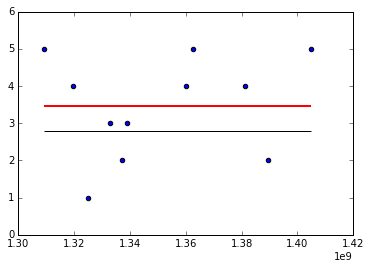

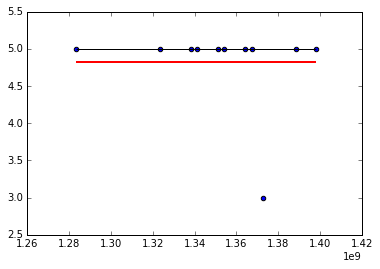

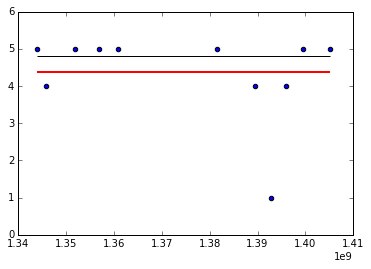

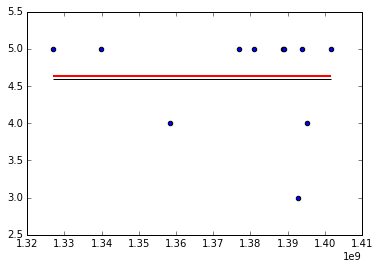

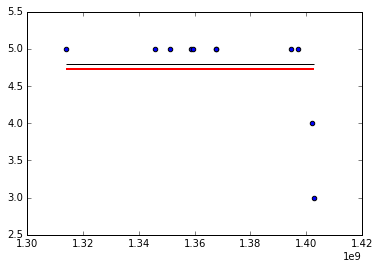

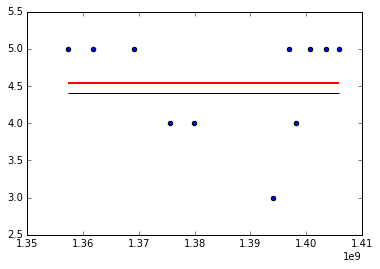

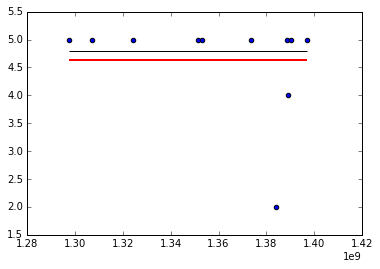

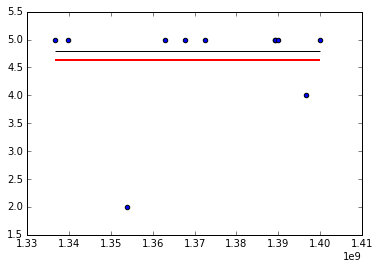

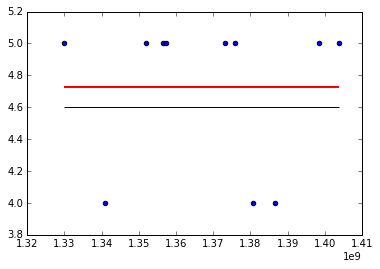

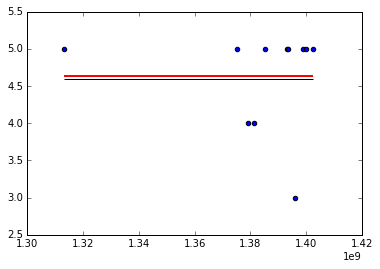

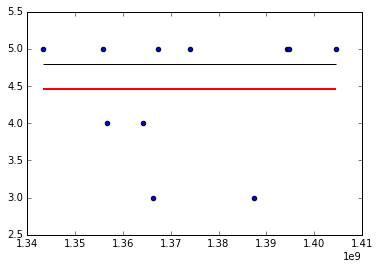

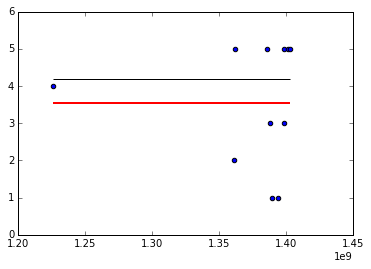

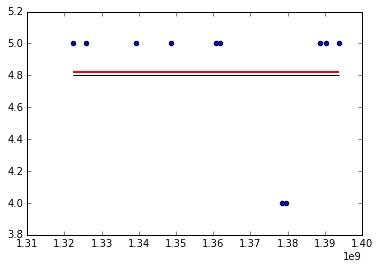

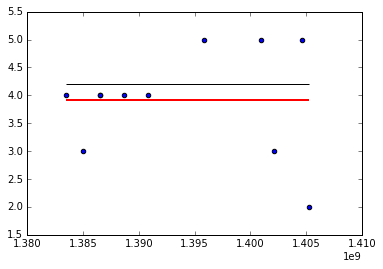

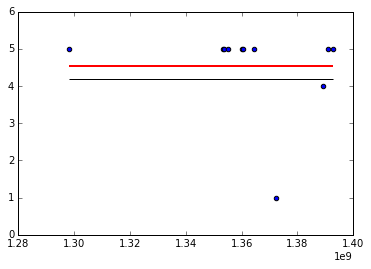

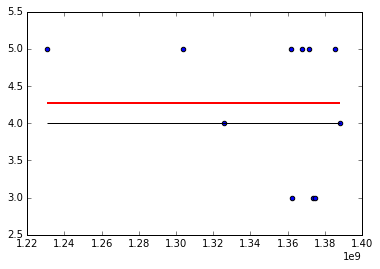

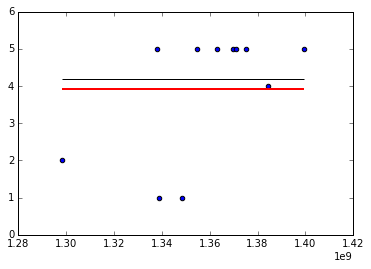

In [32]:
ave_rating, ave_rating_first5 = plot_rating(df,10)

In [33]:
import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np


In [34]:
print(ave_rating_first5)
print(len(ave_rating_first5))

[4.6, 4.8, 4.0, 4.6, 4.4, 4.2, 4.4, 5.0, 4.8, 4.0, 4.4, 4.2, 4.4, 4.2, 4.0, 5.0, 4.6, 4.8, 4.4, 4.8, 3.6, 5.0, 4.2, 4.6, 4.2, 5.0, 4.6, 4.6, 4.6, 5.0, 5.0, 4.4, 4.8, 4.8, 4.6, 5.0, 4.8, 4.8, 4.4, 4.4, 4.8, 4.0, 5.0, 4.2, 4.8, 5.0, 4.8, 4.8, 4.8, 5.0, 5.0, 4.4, 3.6, 4.4, 4.8, 4.8, 4.8, 4.2, 5.0, 4.2, 5.0, 4.6, 5.0, 4.6, 5.0, 4.8, 4.8, 4.2, 4.4, 4.4, 4.8, 4.8, 4.0, 4.6, 4.0, 4.6, 4.8, 5.0, 4.6, 5.0, 4.2, 4.6, 4.6, 3.6, 3.4, 5.0, 4.2, 4.4, 4.8, 4.6, 3.4, 4.8, 3.8, 5.0, 4.8, 4.8, 3.2, 4.6, 4.8, 4.8, 4.8, 4.6, 5.0, 3.8, 4.8, 4.8, 4.0, 4.8, 4.6, 3.6, 4.8, 4.6, 4.4, 4.6, 4.8, 5.0, 4.4, 4.4, 4.6, 4.6, 4.6, 4.8, 4.6, 4.6, 4.8, 3.6, 4.8, 4.8, 4.6, 4.2, 4.4, 3.4, 4.8, 4.0, 4.6, 4.4, 4.8, 4.6, 5.0, 2.4, 4.6, 4.0, 3.2, 5.0, 4.6, 4.8, 4.6, 5.0, 4.8, 4.4, 4.8, 4.2, 4.8, 4.0, 4.0, 3.6, 4.8, 4.4, 4.4, 4.4, 4.0, 4.2, 4.6, 4.4, 4.4, 4.4, 4.8, 4.8, 3.4, 4.8, 4.8, 4.0, 4.4, 4.8, 4.6, 4.8, 4.8, 5.0, 4.4, 5.0, 4.8, 4.4, 4.0, 4.6, 4.6, 4.4, 3.6, 4.8, 5.0, 4.6, 4.2, 4.6, 3.8, 4.8, 5.0, 4.8, 4.2, 4.4, 4.8, 4.2,

In [35]:
print(ave_rating)
print(len(ave_rating))

[4.6871165644171775, 4.580419580419581, 4.620689655172414, 4.649122807017544, 4.655913978494624, 4.5, 4.492957746478873, 4.492753623188406, 4.5, 4.373134328358209, 4.4, 4.158730158730159, 4.596774193548387, 4.362068965517241, 4.637931034482759, 4.543859649122807, 4.473684210526316, 4.818181818181818, 4.327272727272727, 4.461538461538462, 4.204081632653061, 4.723404255319149, 4.217391304347826, 4.782608695652174, 4.434782608695652, 4.866666666666666, 4.4772727272727275, 4.5227272727272725, 4.4523809523809526, 4.682926829268292, 4.864864864864865, 4.8108108108108105, 4.457142857142857, 4.6571428571428575, 4.735294117647059, 4.575757575757576, 4.787878787878788, 4.787878787878788, 4.65625, 4.5, 4.71875, 4.354838709677419, 4.633333333333334, 4.172413793103448, 4.551724137931035, 4.793103448275862, 4.5, 4.607142857142857, 4.666666666666667, 4.888888888888889, 4.962962962962963, 4.538461538461538, 3.8076923076923075, 4.423076923076923, 4.653846153846154, 4.769230769230769, 4.48, 4.52, 4.84, 

In [37]:
X_single = np.array(ave_rating_first5).reshape(-1,1) #list

# Targets
Y_target = np.array(ave_rating).reshape(-1,1) # list

In [42]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X_single,Y_target)

In [43]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(202, 1) (68, 1) (202, 1) (68, 1)


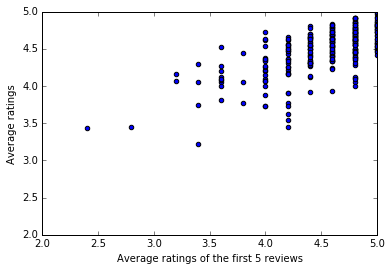

In [41]:
plt.scatter(X_single,Y_target)# we are plotting using all data points,
plt.axis([2, 5, 2, 5])

plt.ylabel('Average ratings')
plt.xlabel('Average ratings of the first 5 reviews')

In [44]:
# Implement Linear Regression
# Create a LinearRegression Object
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is 2.17 


In [46]:
pred_train = lreg.predict(X_train) #gives an estimate of Y_train, to compare with Y_train
pred_test = lreg.predict(X_test)

In [47]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  
      % np.mean((Y_train - pred_train) ** 2))
# note that (Y_train - pred_train) is just the length of that vertical line in D
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  
      %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 0.05
Fit a model X_train, and calculate MSE with X_test and Y_test: 0.05


In [48]:
print(lreg.score(X_train,Y_train))

0.413433436701


In [49]:
print(lreg.score(X_test,Y_test))

0.527655051497
